# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 618


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bluff
Processing Record 2 of Set 1 | cape town
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | norfolk
Processing Record 5 of Set 1 | grand gaube
Processing Record 6 of Set 1 | bouna
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | port alfred
Processing Record 9 of Set 1 | butaritari
Processing Record 10 of Set 1 | ilulissat
Processing Record 11 of Set 1 | phek
Processing Record 12 of Set 1 | jamestown
Processing Record 13 of Set 1 | hermanus
Processing Record 14 of Set 1 | klaksvik
Processing Record 15 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 16 of Set 1 | atuona
Processing Record 17 of Set 1 | yellowknife
Processing Record 18 of Set 1 | codrington
Processing Record 19 of Set 1 | cherskiy
Processing Record 20 of Set 1 | hilo
Processing Record 21 of Set 1 | barrow
Processing Record 22 of Set 1 | lebu
Processing Record 23 o

Processing Record 34 of Set 4 | padang
Processing Record 35 of Set 4 | stromness
Processing Record 36 of Set 4 | georgetown
Processing Record 37 of Set 4 | hope
Processing Record 38 of Set 4 | sorland
Processing Record 39 of Set 4 | carnarvon
Processing Record 40 of Set 4 | fairbanks
Processing Record 41 of Set 4 | dalvik
Processing Record 42 of Set 4 | cumra
Processing Record 43 of Set 4 | rio grande city
Processing Record 44 of Set 4 | sioux lookout
Processing Record 45 of Set 4 | svirstroy
Processing Record 46 of Set 4 | marsh harbour
Processing Record 47 of Set 4 | noumea
Processing Record 48 of Set 4 | laguna
Processing Record 49 of Set 4 | khatanga
Processing Record 0 of Set 5 | meulaboh
Processing Record 1 of Set 5 | tabory
Processing Record 2 of Set 5 | japura
Processing Record 3 of Set 5 | namatanai
Processing Record 4 of Set 5 | dikson
Processing Record 5 of Set 5 | wicklow
Processing Record 6 of Set 5 | shu
Processing Record 7 of Set 5 | brae
Processing Record 8 of Set 5 | k

Processing Record 26 of Set 8 | bethanien
Processing Record 27 of Set 8 | port macquarie
Processing Record 28 of Set 8 | bacuit
City not found. Skipping...
Processing Record 29 of Set 8 | benicarlo
Processing Record 30 of Set 8 | uarini
Processing Record 31 of Set 8 | krasnoselkup
Processing Record 32 of Set 8 | talakan
Processing Record 33 of Set 8 | ust-tsilma
Processing Record 34 of Set 8 | leningradskiy
Processing Record 35 of Set 8 | tarakan
Processing Record 36 of Set 8 | sao felix do xingu
Processing Record 37 of Set 8 | charleston
Processing Record 38 of Set 8 | mabaruma
Processing Record 39 of Set 8 | vanimo
Processing Record 40 of Set 8 | bam
Processing Record 41 of Set 8 | juneau
Processing Record 42 of Set 8 | strezhevoy
Processing Record 43 of Set 8 | flinders
Processing Record 44 of Set 8 | lompoc
Processing Record 45 of Set 8 | rio bravo
Processing Record 46 of Set 8 | palora
Processing Record 47 of Set 8 | ancud
Processing Record 48 of Set 8 | manokwari
Processing Recor

Processing Record 12 of Set 12 | kamskoye ustye
Processing Record 13 of Set 12 | caravelas
Processing Record 14 of Set 12 | rio grande
Processing Record 15 of Set 12 | dongsheng
Processing Record 16 of Set 12 | vetlanda
Processing Record 17 of Set 12 | paracuru
Processing Record 18 of Set 12 | guaymas
Processing Record 19 of Set 12 | nanakuli
Processing Record 20 of Set 12 | staryy nadym
Processing Record 21 of Set 12 | pahrump
Processing Record 22 of Set 12 | paamiut
Processing Record 23 of Set 12 | dwarka
Processing Record 24 of Set 12 | camacha
Processing Record 25 of Set 12 | tura
Processing Record 26 of Set 12 | iracoubo
Processing Record 27 of Set 12 | burkhala
City not found. Skipping...
Processing Record 28 of Set 12 | dubai
Processing Record 29 of Set 12 | sungaipenuh
Processing Record 30 of Set 12 | zeya
Processing Record 31 of Set 12 | karakendzha
City not found. Skipping...
Processing Record 32 of Set 12 | shalakusha
Processing Record 33 of Set 12 | linqiong
Processing Reco

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          564
Lat           564
Lng           564
Max Temp      564
Humidity      564
Cloudiness    564
Wind Speed    564
Country       564
Date          564
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bluff,-46.6000,168.3333,12.63,72,79,5.11,NZ,1673456986
1,cape town,-33.9258,18.4232,24.50,67,96,5.36,ZA,1673456703
2,ushuaia,-54.8000,-68.3000,10.81,71,75,7.72,AR,1673456986
3,norfolk,42.1668,-71.2495,2.54,68,40,4.12,US,1673456987
4,grand gaube,-20.0064,57.6608,26.32,72,67,2.24,MU,1673456987


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bluff,-46.6000,168.3333,12.63,72,79,5.11,NZ,1673456986
1,cape town,-33.9258,18.4232,24.50,67,96,5.36,ZA,1673456703
2,ushuaia,-54.8000,-68.3000,10.81,71,75,7.72,AR,1673456986
3,norfolk,42.1668,-71.2495,2.54,68,40,4.12,US,1673456987
4,grand gaube,-20.0064,57.6608,26.32,72,67,2.24,MU,1673456987


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

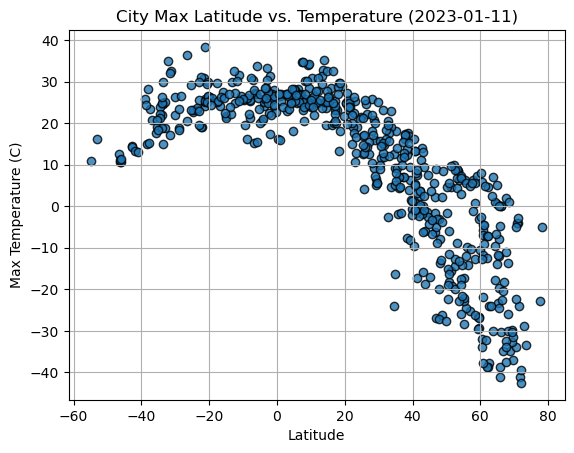

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

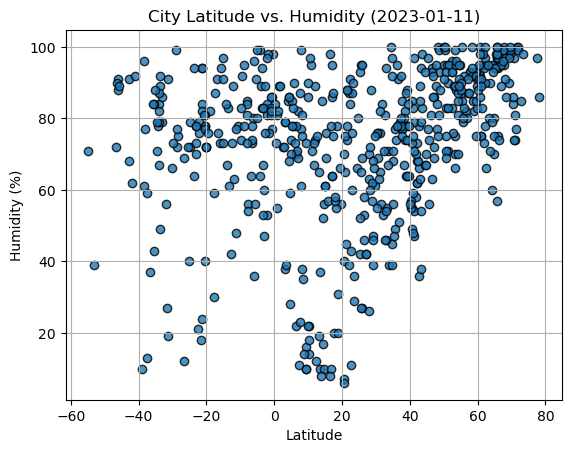

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Humidity"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

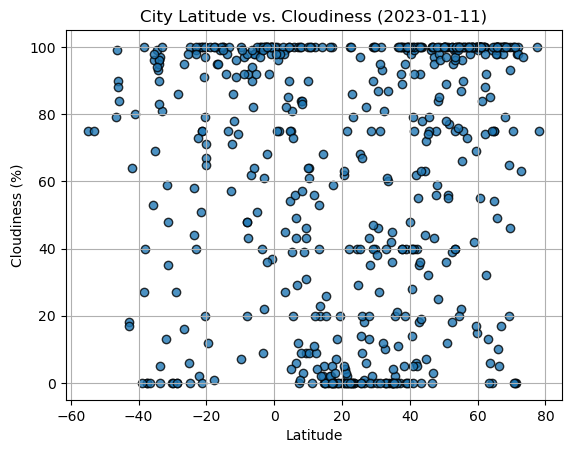

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

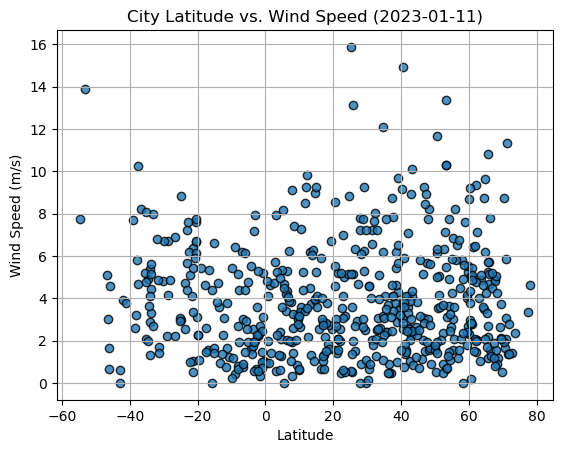

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(
    city_data_df["Lat"], 
    city_data_df["Wind Speed"],
    edgecolor="black", 
    linewidths=1, 
    marker="o", 
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%Y-%m-%d"))
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,norfolk,42.1668,-71.2495,2.54,68,40,4.12,US,1673456987
5,bouna,9.2667,-3.0000,33.88,10,9,3.23,CI,1673456988
8,butaritari,3.0707,172.7902,27.11,79,45,7.93,KI,1673456989
9,ilulissat,69.2167,-51.1000,-29.81,90,65,2.63,GL,1673456989
10,phek,25.6667,94.5000,4.19,95,14,0.53,IN,1673456990


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bluff,-46.6000,168.3333,12.63,72,79,5.11,NZ,1673456986
1,cape town,-33.9258,18.4232,24.50,67,96,5.36,ZA,1673456703
2,ushuaia,-54.8000,-68.3000,10.81,71,75,7.72,AR,1673456986
4,grand gaube,-20.0064,57.6608,26.32,72,67,2.24,MU,1673456987
6,busselton,-33.6500,115.3333,15.02,92,0,3.29,AU,1673456988


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7201347257861231


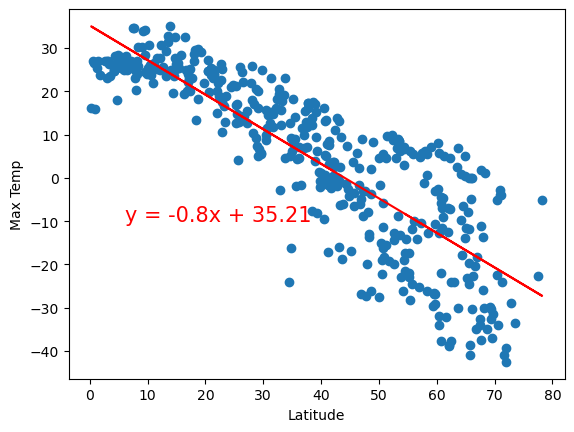

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp",(6,-10))

The r-value is: 0.2195697845317092


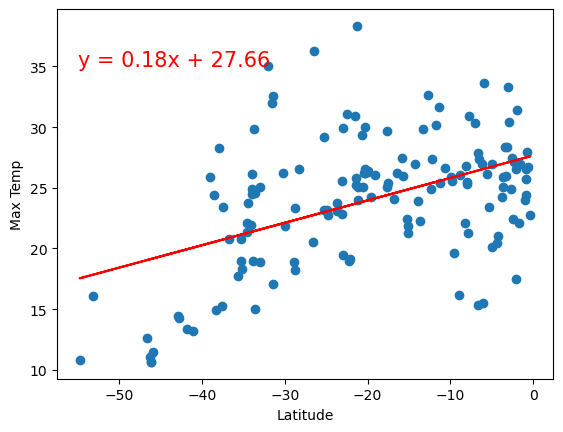

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (-55, 35))

**Discussion about the linear relationship:** The high `r` value indicates a strong positive correlation between latitude and max temperature. R values ~ 0.5 indicate that there is a moderate positive correlation. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.2682771741930756


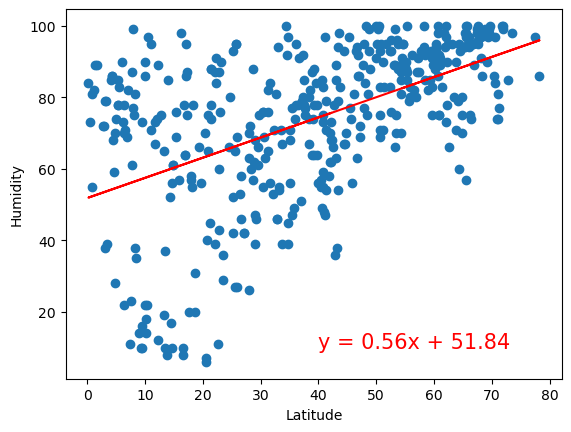

In [17]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity",(40,10))

The r-value is: 0.026368321789653856


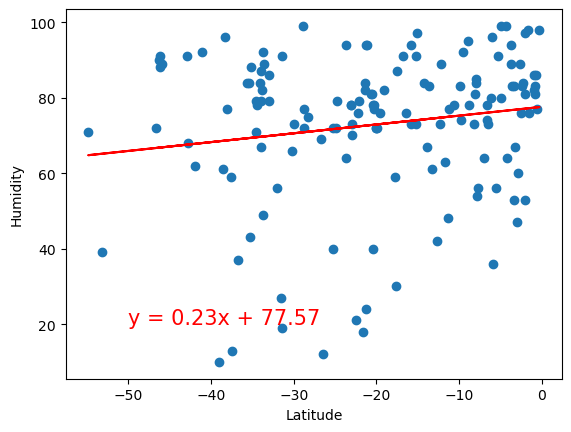

In [18]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (-50, 20))

**Discussion about the linear relationship:** The low `r` values indicate a weak to no relationship between humidity and latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.12684629995290234


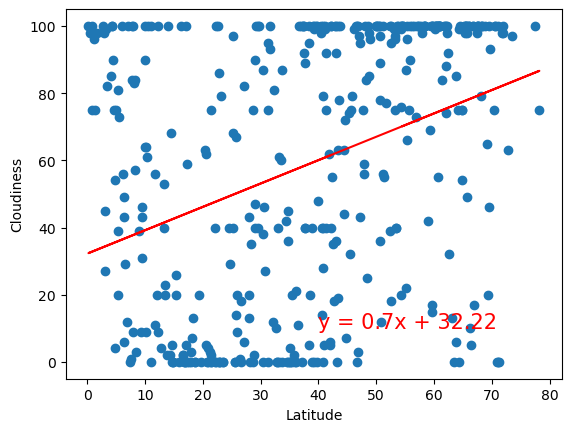

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (40,10))

The r-value is: 0.06775589005754888


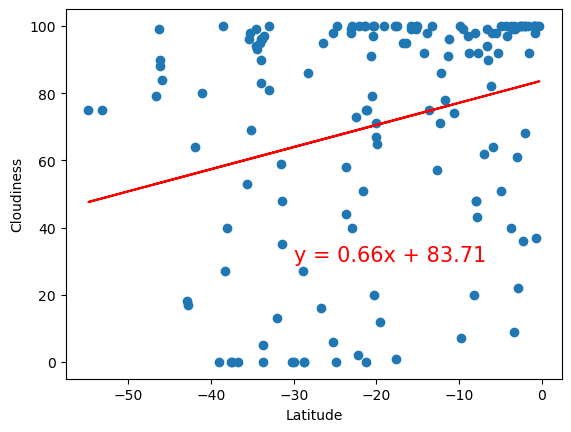

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (-30,30))

**Discussion about the linear relationship:** The low `r` values indicate a weak positive relationship between latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0016412103829501622


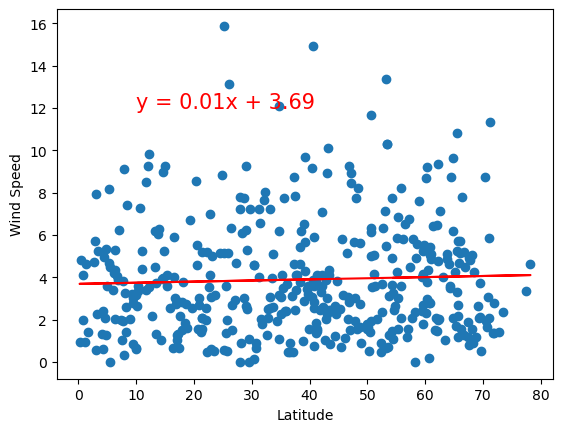

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (10,12))

The r-value is: 0.11990239241315206


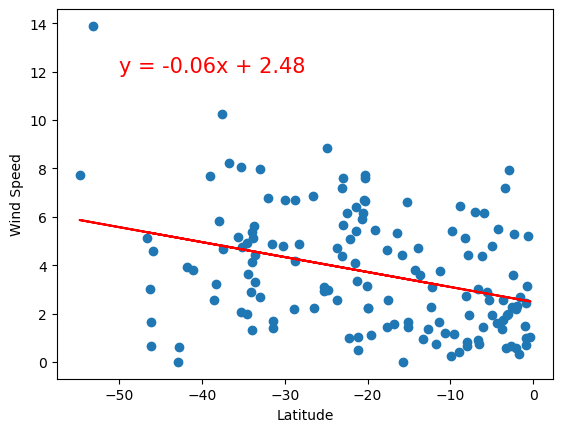

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (-50, 12))

**Discussion about the linear relationship:** The low `r` values indicate that there is no real relationship between wind speed and latitude. The difference between the hemispheres doesn't seem to be significant enough to comment upon.